# **Project Name** - Breast Cancer Prediction with Machine Learning


 Project Type - Classification

 Contribution - Individual

 Member Name - Hari Kumar reddy

# **About Dataset**

**Description:** Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.


The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning and the Breast Cancer Wisconsin (Diagnostic) Dataset.

    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

## Import libraries

In [1]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Library used for standardize features
from sklearn.preprocessing import StandardScaler

# Import model selection libraries
from sklearn.model_selection import train_test_split,GridSearchCV

# Library used for ML Model implementation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Library used to Save and load ML models quickly
import pickle

# Library used for mathematical functions
import math

# Import warnings

In [2]:
# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')

#  Reading Dataset

In [3]:
# Reading dataset
df=pd.read_csv("/content/breast-cancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
pd.set_option('display.max_columns', None)  # Ensures all columns are displayed

In [5]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'Number of duplicated rows are {dup}')

Number of duplicated rows are 0


In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [10]:
# Counts the number of occurrences of each unique value in the "diagnosis" column
df.diagnosis.value_counts()

,count
diagnosis,
B,357
M,212


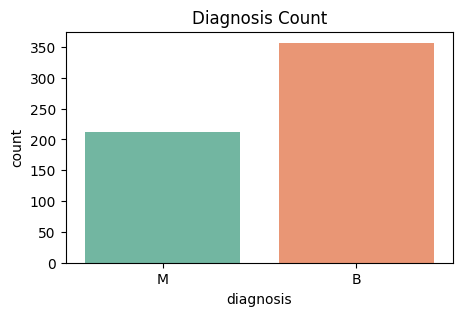

In [11]:
# Count of Diagnosis (M = Malignant, B = Benign)
plt.figure(figsize=(5,3))
sns.countplot(x='diagnosis', data=df,palette="Set2")
plt.title('Diagnosis Count')
plt.show()

In [12]:
# Generates summary statistics for numerical columns in the DataFrame
# Includes count, mean, standard deviation, min, max, and quartiles (25%, 50%, 75%)
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


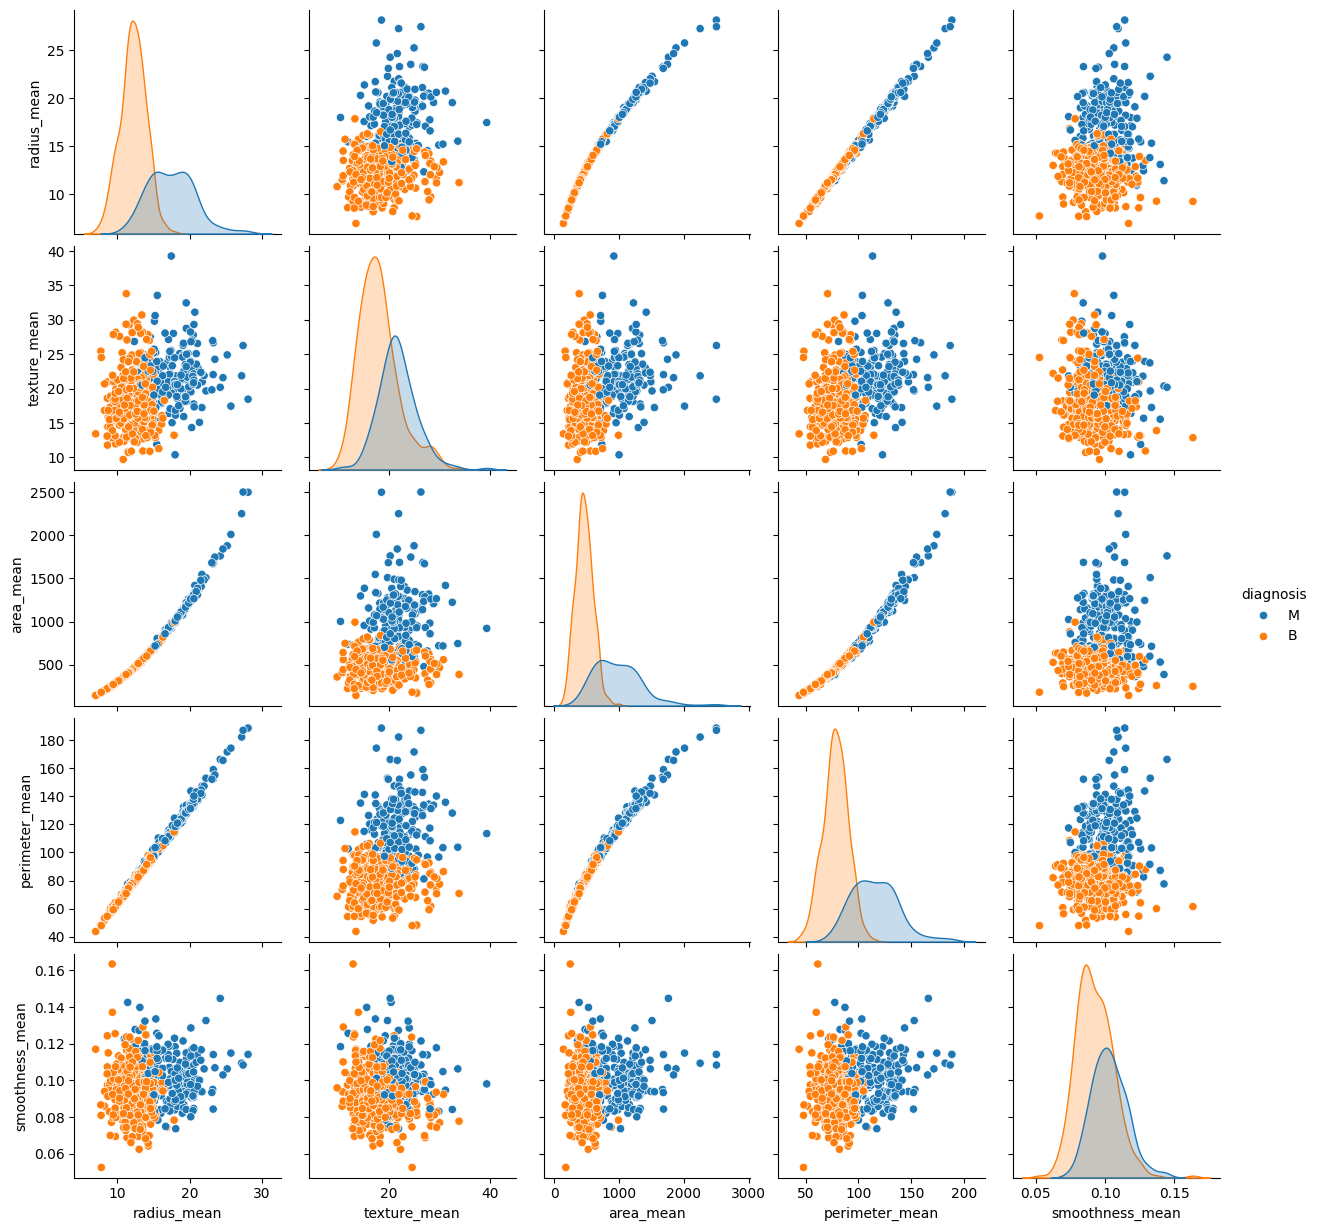

In [13]:
# Pairplot for a quick overview of relationships between variables
sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean',"smoothness_mean"])
plt.show()

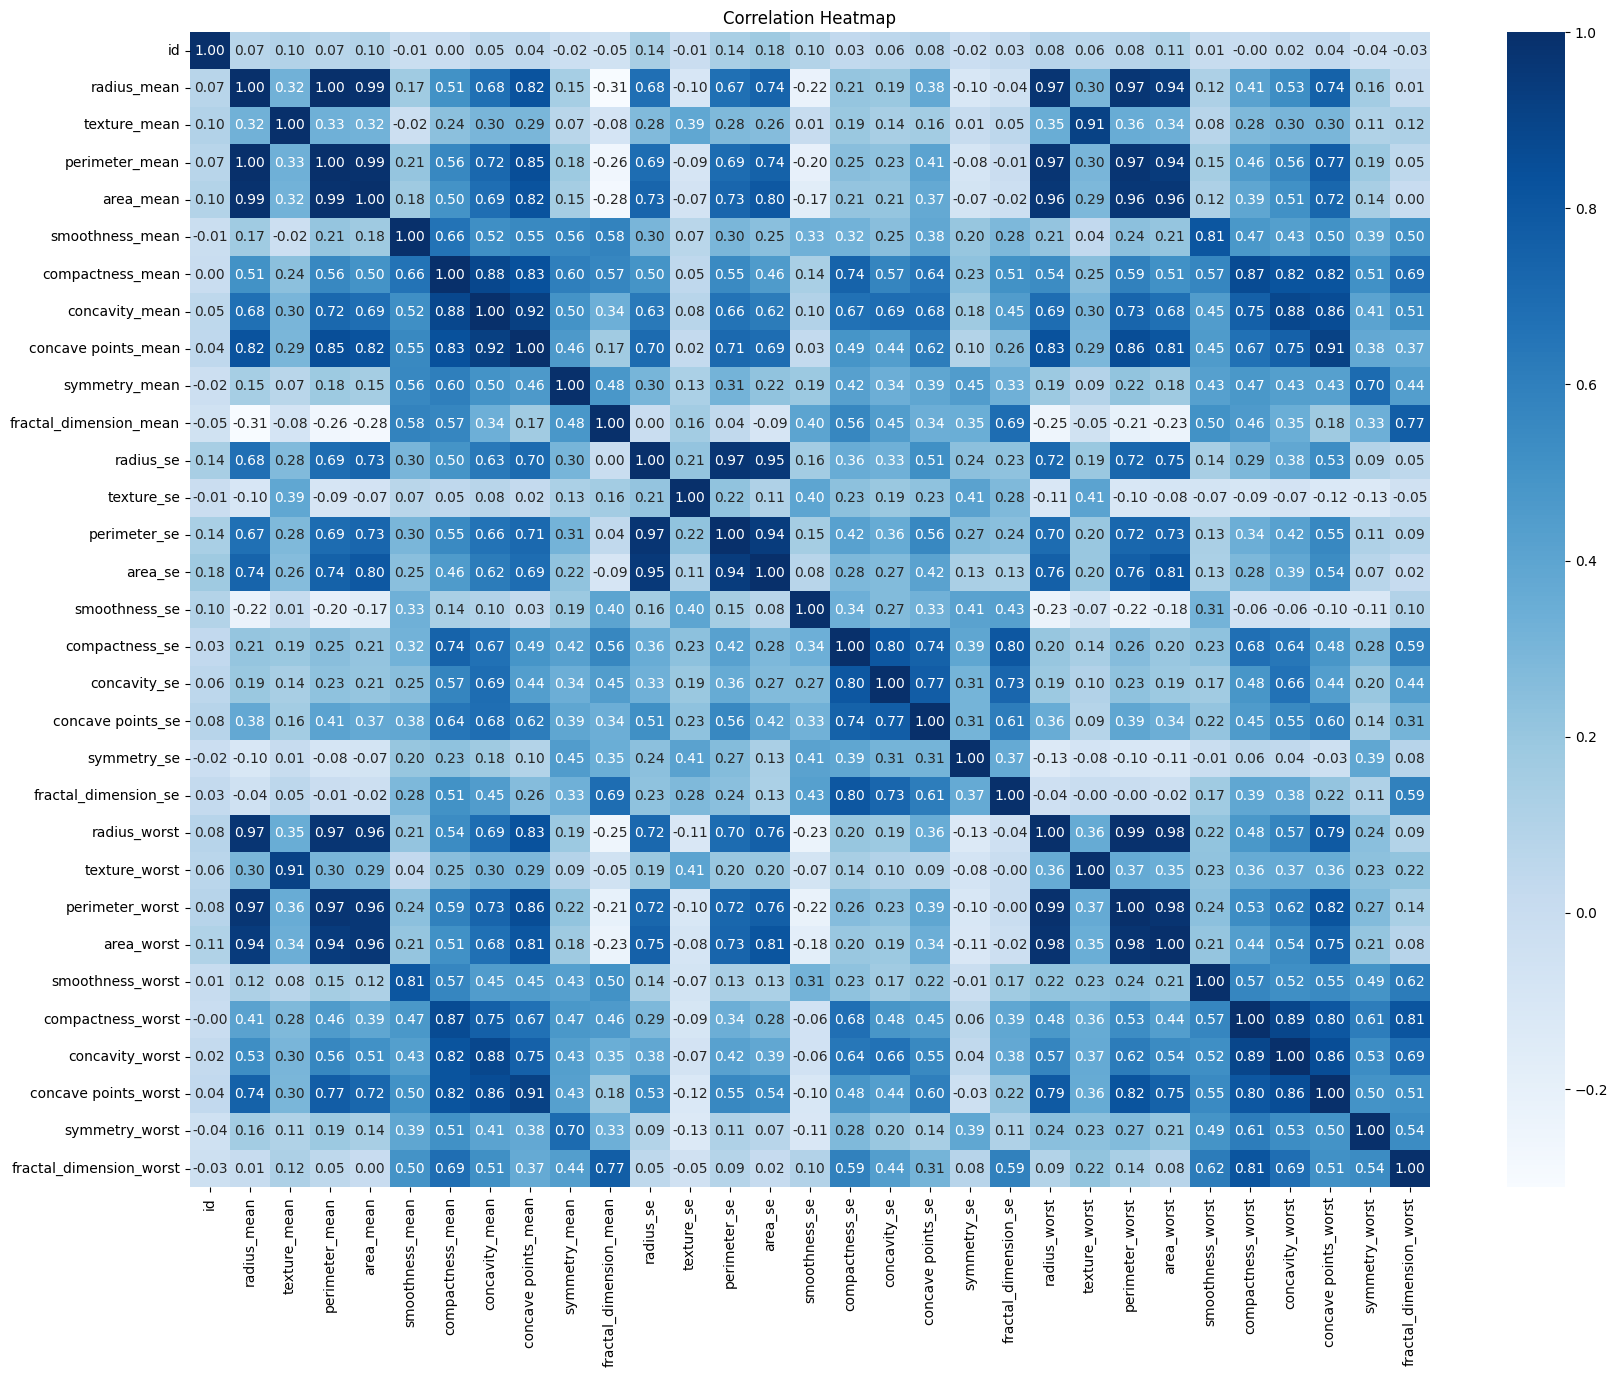

In [14]:
# Correlation heatmap of features
plt.figure(figsize=(20,15))
# Calculate correlation only for numerical features by excluding 'diagnosis'
correlation = df.drop(columns=['diagnosis']).corr()
sns.heatmap(correlation, annot=True, cmap="Blues", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

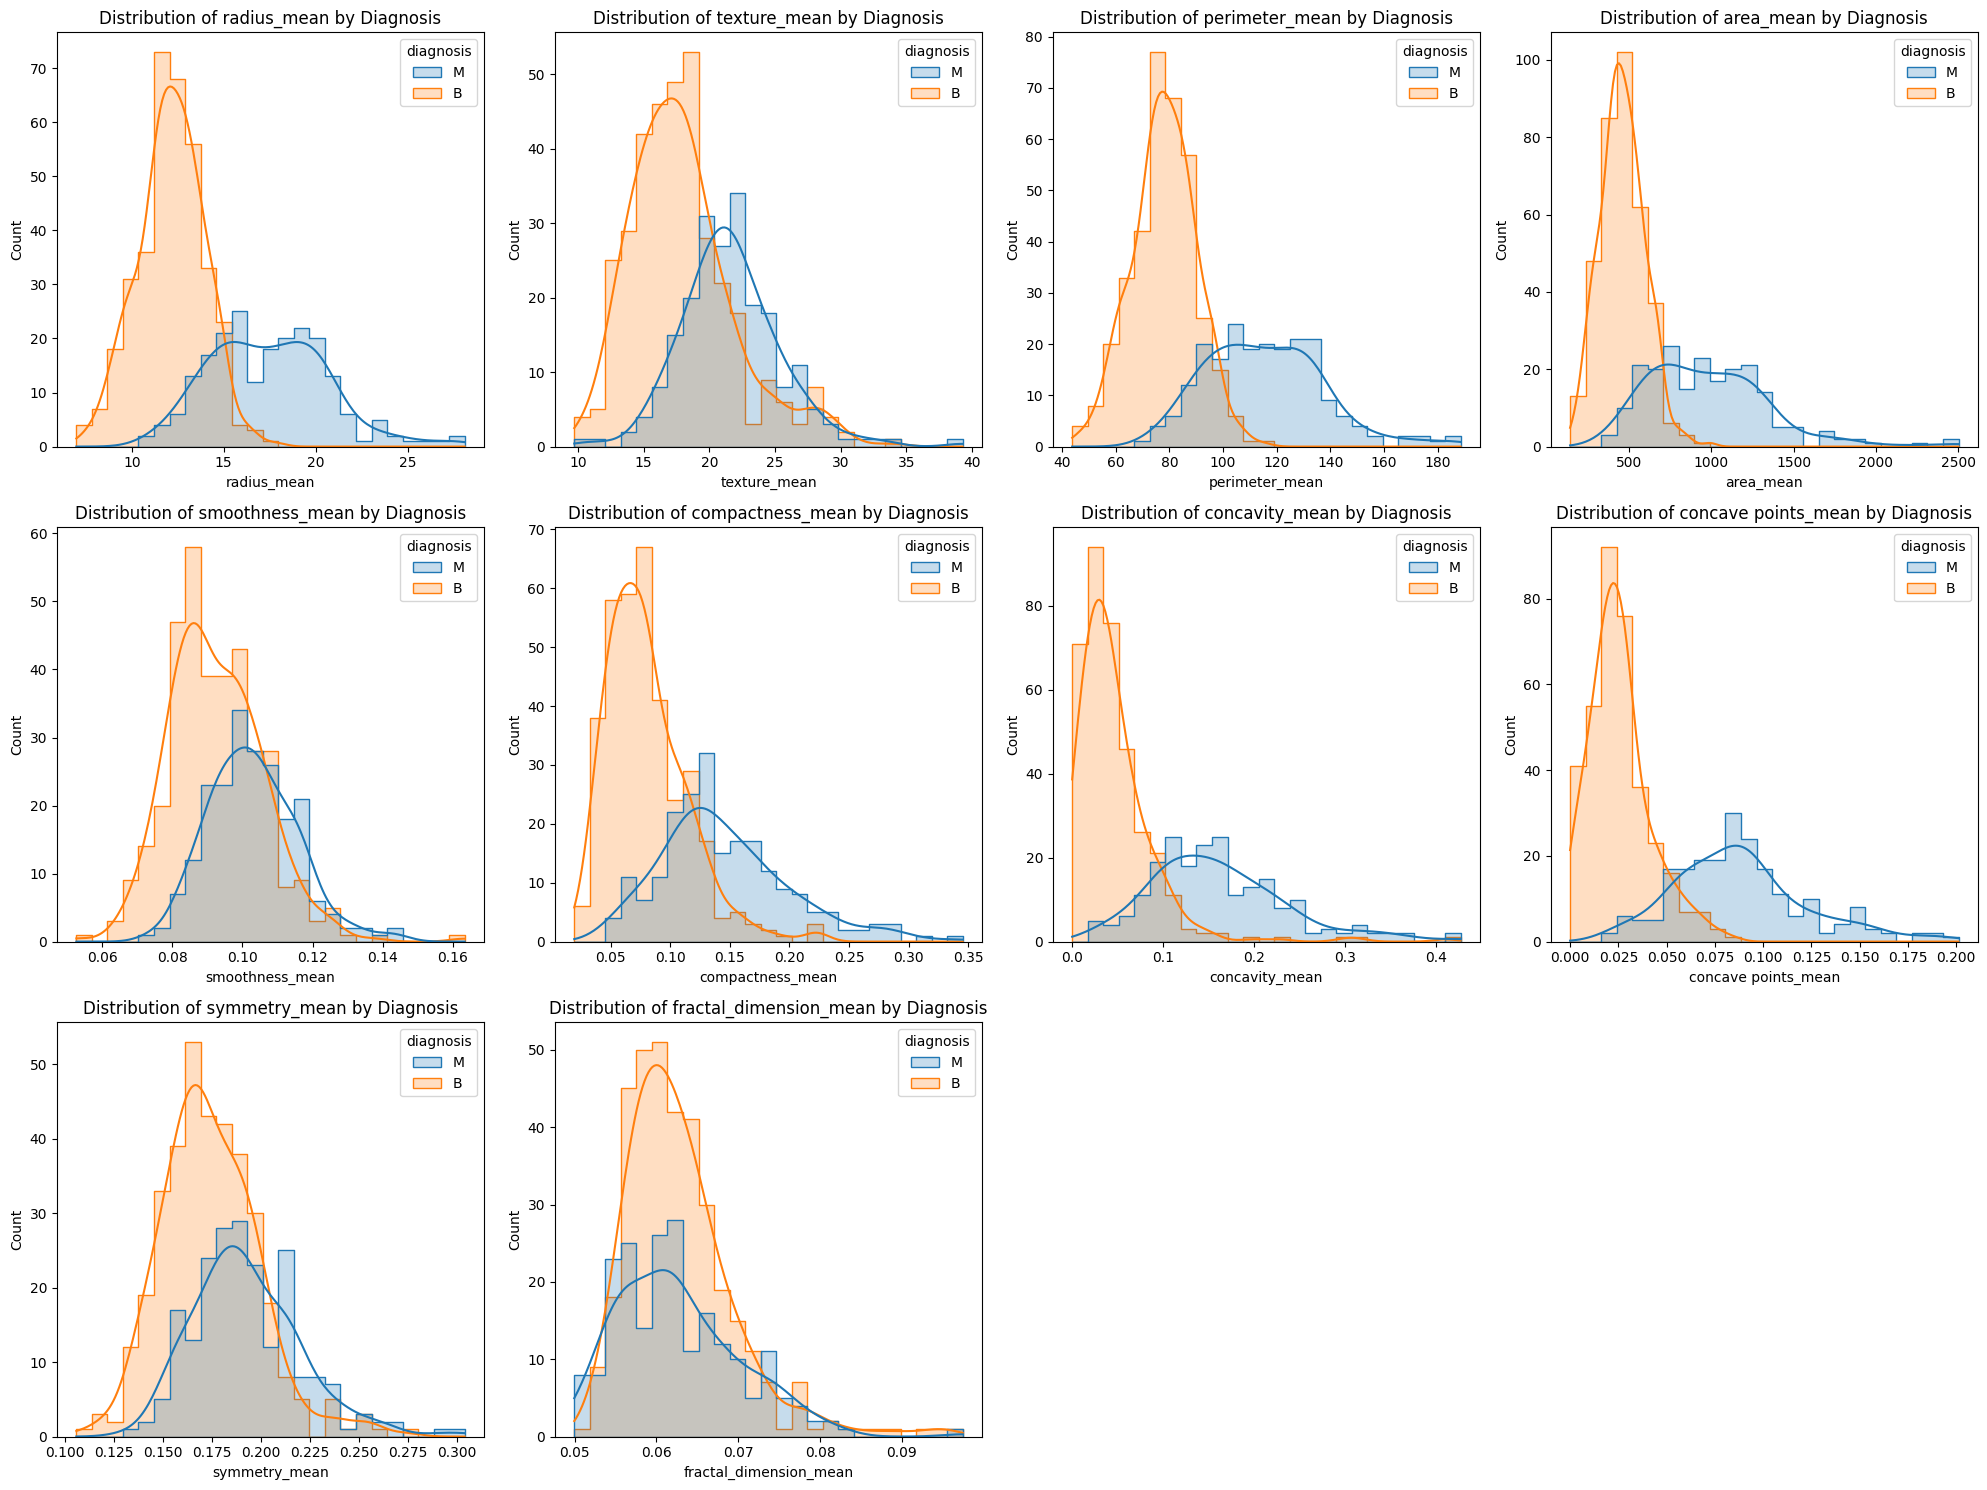

In [15]:
# Distribution Plots for Mean Features by Diagnosis
mean_columns = df.columns[2:12]  # Selecting columns related to mean features
plt.figure(figsize=(20,15))

for i, column in enumerate(mean_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data=df, x=column, hue='diagnosis', kde=True, element="step", bins=25)
    plt.title(f'Distribution of {column} by Diagnosis')

plt.tight_layout()
plt.show()

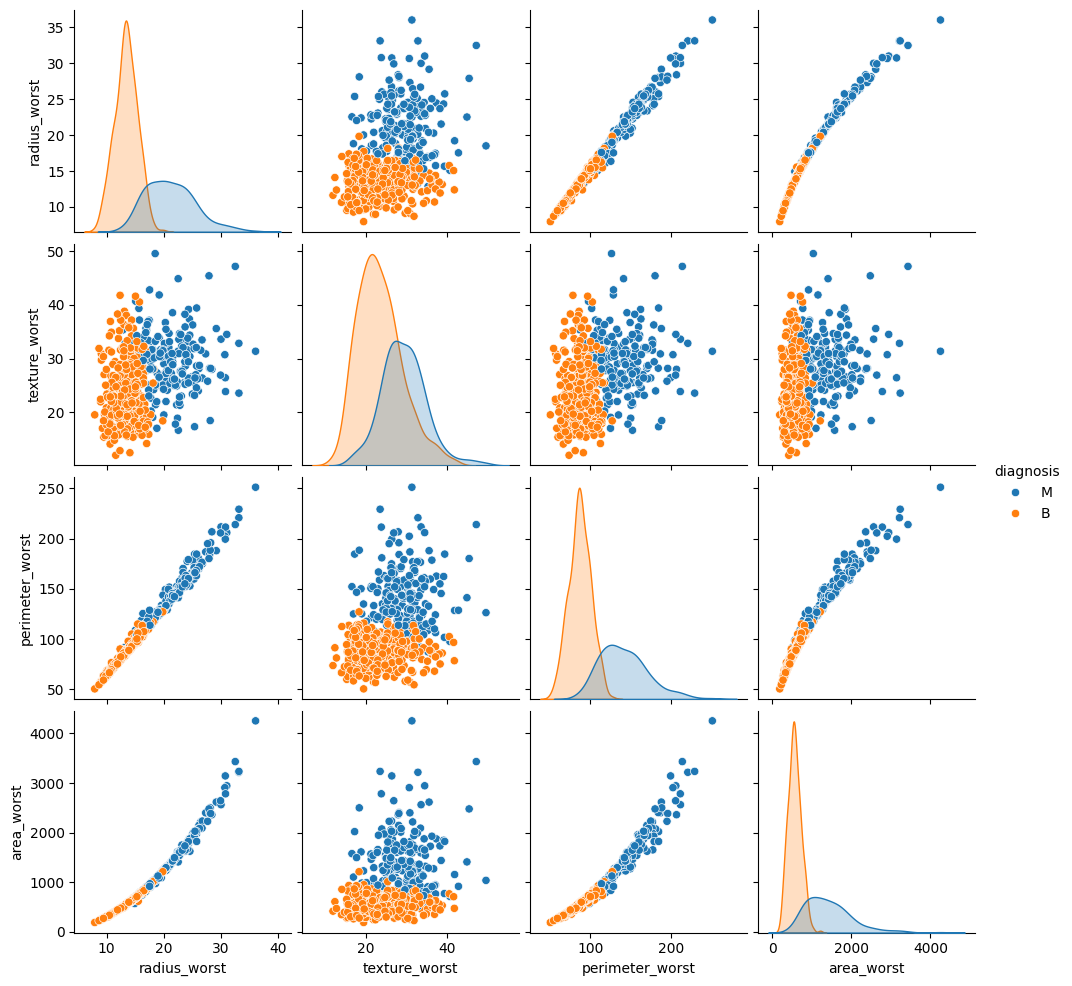

In [16]:
# Creates a new DataFrame 'worst_features' containing only the selected worst-case feature columns
worst_features = df[['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'diagnosis']]

# Creating a pairplot for "worst" features
sns.pairplot(worst_features, hue='diagnosis', diag_kind='kde')
plt.show()

#Splitting the dataset

In [17]:
# Creates a new DataFrame 'X' by dropping specific columns from 'df'
X=df.drop(['id','radius_mean','diagnosis','perimeter_mean','area_mean','radius_se','texture_se','area_se'],axis=1)
# Creates the target variable 'y' by mapping 'diagnosis' to binary values
y=df['diagnosis'].map(lambda x: 1 if x == 'M' else 0)

In [18]:
X

,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,perimeter_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,8.589,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,3.398,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,4.585,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,3.445,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,5.438,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,7.673,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,5.203,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,3.425,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,29.33,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,5.772,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [19]:
y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


#Spliting Data into Train-Test-Split

In [20]:
# Splits the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [21]:
X_train

,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,perimeter_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
243,23.77,0.08043,0.06807,0.046970,0.023440,0.1773,0.05429,2.829,0.004351,0.026670,0.033710,0.010070,0.02598,0.003087,15.01,26.34,98.00,706.0,0.09368,0.14420,0.13590,0.06106,0.2663,0.06321
426,14.98,0.09816,0.10130,0.063350,0.022180,0.1925,0.06915,2.564,0.007364,0.038670,0.052630,0.012640,0.02161,0.004830,12.13,21.57,81.41,440.4,0.13270,0.29960,0.29390,0.09310,0.3020,0.09646
7,20.83,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,3.856,0.008805,0.030290,0.024880,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
84,15.65,0.09723,0.07165,0.041510,0.018630,0.2079,0.05968,1.441,0.005969,0.018120,0.020070,0.007027,0.01972,0.002607,13.67,24.90,87.78,567.9,0.13770,0.20030,0.22670,0.07632,0.3379,0.07924
493,12.83,0.07372,0.04043,0.007173,0.011490,0.1613,0.06013,2.108,0.010390,0.010030,0.006416,0.007895,0.02869,0.004821,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,21.17,0.09773,0.08120,0.025550,0.021790,0.2019,0.06290,1.930,0.009895,0.030530,0.016300,0.009276,0.02258,0.002272,13.05,27.21,85.09,522.9,0.14260,0.21870,0.11640,0.08263,0.3075,0.07351
40,21.58,0.08162,0.06031,0.031100,0.020310,0.1784,0.05587,1.572,0.003280,0.011020,0.013900,0.006881,0.01380,0.001286,15.93,30.25,102.50,787.9,0.10940,0.20430,0.20850,0.11120,0.2994,0.07146
316,14.08,0.07734,0.03212,0.011230,0.005051,0.1673,0.05649,1.438,0.005343,0.005767,0.011230,0.005051,0.01977,0.000950,12.85,16.47,81.60,513.1,0.10010,0.05332,0.04116,0.01852,0.2293,0.06037
303,18.61,0.10680,0.06678,0.022970,0.017800,0.1482,0.06600,1.035,0.008875,0.009362,0.018080,0.009199,0.01791,0.003317,11.06,24.54,70.76,375.4,0.14130,0.10440,0.08423,0.06528,0.2213,0.07842


In [22]:
X_test

,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,perimeter_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
447,17.66,0.09179,0.08890,0.040690,0.022600,0.1893,0.05886,1.482,0.004796,0.011710,0.017580,0.006897,0.02254,0.001971,16.430,22.74,105.90,829.5,0.12260,0.18810,0.20600,0.08308,0.3600,0.07285
308,12.71,0.07376,0.03614,0.002758,0.004419,0.1365,0.05335,1.509,0.003338,0.003746,0.002030,0.003242,0.01480,0.001566,14.970,16.94,95.48,698.7,0.09023,0.05836,0.01379,0.02210,0.2267,0.06192
59,11.79,0.09752,0.05272,0.020610,0.007799,0.1683,0.07187,1.046,0.010110,0.010550,0.019810,0.005742,0.02090,0.002788,9.507,15.40,59.90,274.9,0.17330,0.12390,0.11680,0.04419,0.3220,0.09026
39,20.82,0.10160,0.12550,0.106300,0.054390,0.1720,0.06419,1.545,0.005367,0.022390,0.030490,0.012620,0.01377,0.003187,15.530,26.02,107.30,740.4,0.16100,0.42250,0.50300,0.22580,0.2807,0.10710
295,13.27,0.09198,0.06221,0.010630,0.019170,0.1592,0.05912,1.479,0.004348,0.008153,0.004272,0.006829,0.02154,0.001802,14.670,16.93,94.17,661.1,0.11700,0.10720,0.03732,0.05802,0.2823,0.06794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,18.84,0.09676,0.07952,0.026880,0.017810,0.1759,0.06183,1.535,0.005608,0.016460,0.015290,0.009997,0.01909,0.002133,13.750,25.99,87.82,579.7,0.12980,0.18390,0.12550,0.08312,0.2744,0.07238
304,18.16,0.08853,0.07694,0.033440,0.015020,0.1411,0.06243,2.475,0.006652,0.026520,0.022210,0.007807,0.01894,0.003411,12.680,21.61,82.69,489.8,0.11440,0.17890,0.12260,0.05509,0.2208,0.07638
411,16.83,0.10770,0.07804,0.030460,0.024800,0.1714,0.06340,1.342,0.005158,0.009355,0.010560,0.007483,0.01718,0.002198,12.410,26.44,79.93,471.4,0.13690,0.14820,0.10670,0.07431,0.2998,0.07881
533,20.67,0.09156,0.13130,0.152300,0.101500,0.2166,0.05419,5.168,0.004938,0.030890,0.040930,0.016990,0.02816,0.002719,23.230,27.15,152.00,1645.0,0.10970,0.25340,0.30920,0.16130,0.3220,0.06386


In [23]:
y_train

,diagnosis
243,0
426,0
7,1
84,0
493,0
...,...
415,0
40,1
316,0
303,0


# Scaling the Data

In [24]:
# Standardization ensures that all features have a mean of 0 and a standard deviation of 1
# improving model performance, especially for algorithms sensitive to scale differences.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [25]:
X_train.shape

(455, 24)

In [26]:
X_test.shape

(114, 24)

In [27]:
y_train.shape

(455,)

In [28]:
y_test.shape

(114,)

# **Model**

In [29]:
# Creates an empty DataFrame called 'result' with columns for storing model performance metrics
result=pd.DataFrame({'Model':[], "Training Accuracy":[], "Testing Accuracy":[], "F1 Score":[], "Recall":[],
                     "Precision":[]})
result

,Model,Training Accuracy,Testing Accuracy,F1 Score,Recall,Precision




#KNN


In [30]:
# Finding optimal-K by using Hyperparameter tuning
# Create a list of k values from 1 to 49, stepping by 4
k = list(range(1, 50, 4))

# Initialize empty lists to store the training and cross-validation accuracies
train_accuracy = []
test_accuracy = []

# Iterate over each k value in the list
for i in k:
    # Create a KNeighborsClassifier instance with n_neighbors set to the current k value
    knn = KNeighborsClassifier(n_neighbors=i)

    # Fit the model to the training data (x_train, y_train)
    knn.fit(X_train, y_train)

    # Predict the labels for the training set and the cross-validation set
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # Calculate and append the accuracy of the model on the training set
    train_accuracy.append(accuracy_score(y_train, y_train_pred))

    # Calculate and append the accuracy of the model on the test set
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Find the optimal k value by selecting the k that gives the maximum test accuracy
optimal_k = k[test_accuracy.index(max(test_accuracy))]

# Print the optimal k value for the best cross-validation accuracy
print("Optimal-k is:", optimal_k)


Optimal-k is: 9


In [31]:
knn=KNeighborsClassifier(n_neighbors=optimal_k)

knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)


In [32]:
# finding the accuracy,precision,recall and F1 scores for KNN model
train_acc=knn.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9692307692307692
Testing Accuracy : 0.9736842105263158
F1 Score : 0.963855421686747
Recall : 0.9302325581395349
Precision : 1.0


In [33]:
# Prints the classification report, which includes precision, recall, F1-score, and support for each class
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



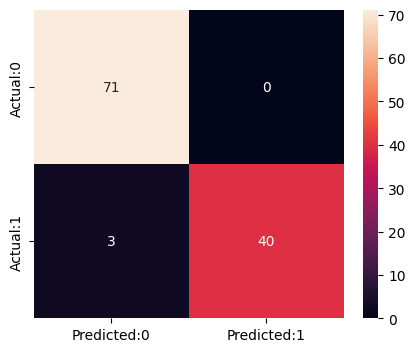

In [34]:
# Creates a confusion matrix comparing actual values (y_test) and predicted values (y_pred)
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

In [35]:
# Adds a new row to the 'result' DataFrame at index 0 with the following values:
result.loc[0]=['KNN', train_acc, test_acc, f1, recal, prec]

# Naive Bayes

In [36]:
# finding optimal alpha by using Hyperparameter tuning

alpha=[10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_accuracy=[]
test_accuracy=[]

for i in alpha:
  clf=BernoulliNB(alpha=i)
  clf.fit(X_train,y_train)

  y_train_pred=clf.predict(X_train)
  y_test_pred=clf.predict(X_test)

  train_accuracy.append(accuracy_score(y_train,y_train_pred))
  test_accuracy.append(accuracy_score(y_test,y_test_pred))

optimal_alpha=alpha[train_accuracy.index(max(train_accuracy))]

print("Optimal-Alpha for is:",optimal_alpha)

Optimal-Alpha for is: 1


In [37]:
NB = BernoulliNB(alpha=optimal_alpha)

NB.fit(X_train,y_train)
y_pred=NB.predict(X_test)


In [38]:
# finding the accuracy,precision,recall and F1 scores for Naive Bayes model
train_acc=NB.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9340659340659341
Testing Accuracy : 0.9385964912280702
F1 Score : 0.9213483146067416
Recall : 0.9534883720930233
Precision : 0.8913043478260869


In [39]:
# Prints the classification report, which includes precision, recall, F1-score, and support for each class
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        71
           1       0.89      0.95      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



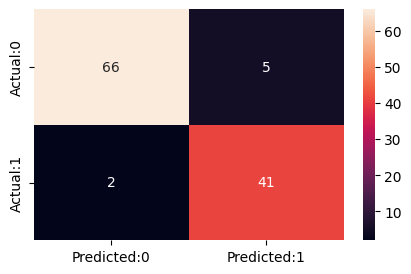

In [40]:
# Creates a confusion matrix comparing actual values (y_test) and predicted values (y_pred)
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

In [41]:
# Adds a new row to the 'result' DataFrame at index 1 with the following values:
result.loc[1]=['Gaussian Naives Bayes', train_acc, test_acc, f1, recal, prec]

## Logistic Regression

In [42]:
# finding optimal C by using Hyperparameter tuning

C=[10000,1000,100,10,1,0.1,0.01,0.0001,0.00001]

train_accuracy=[]
test_accuracy=[]

for i in C:
  clf=LogisticRegression(C=i)
  clf.fit(X_train,y_train)
  y_train_pred=clf.predict(X_train)
  y_test_pred=clf.predict(X_test)

  train_accuracy.append(accuracy_score(y_train,y_train_pred))
  test_accuracy.append(accuracy_score(y_test,y_test_pred))

optimal_C=C[test_accuracy.index(max(test_accuracy))]

print("optimal_c is:",optimal_C)

optimal_c is: 1


In [43]:
LR=LogisticRegression(C=optimal_C)

LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [44]:
# finding the accuracy,precision,recall and F1 scores for Logistic regression model
train_acc=LR.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.989010989010989
Testing Accuracy : 0.9824561403508771
F1 Score : 0.9761904761904762
Recall : 0.9534883720930233
Precision : 1.0


In [45]:
# Prints the classification report, which includes precision, recall, F1-score, and support for each class
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



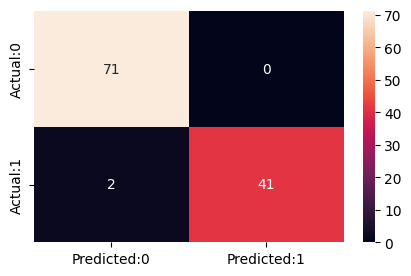

In [46]:
# Creates a confusion matrix comparing actual values (y_test) and predicted values (y_pred)
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

In [47]:
# Adds a new row to the 'result' DataFrame at index 2 with the following values:
result.loc[2]=['Logistic Regression', train_acc, test_acc, f1, recal, prec]

## SVM

In [48]:
# finding optimal C by using Hyperparameter tuning
C=[10000,1000,100,10,1,0.1,0.01,0.0001,0.00001]

train_accuracy=[]
test_accuracy=[]

for i in C:
  linear_svc=SVC()
  linear_svc.fit(X_train,y_train)
  y_train_pred=linear_svc.predict(X_train)
  y_cv_pred=linear_svc.predict(X_test)

  train_accuracy.append(accuracy_score(y_train,y_train_pred))
  test_accuracy.append(accuracy_score(y_test,y_test_pred))

optimal_C=C[test_accuracy.index(max(test_accuracy))]

print("optimal-C is:",optimal_C)

optimal-C is: 10000


In [49]:
svm=SVC()

svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)

In [50]:
# finding the accuracy,precision,recall and F1 scores for Logistic regression model
train_acc=svm.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9868131868131869
Testing Accuracy : 0.9912280701754386
F1 Score : 0.9882352941176471
Recall : 0.9767441860465116
Precision : 1.0


In [51]:
# Prints the classification report, which includes precision, recall, F1-score, and support for each class
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



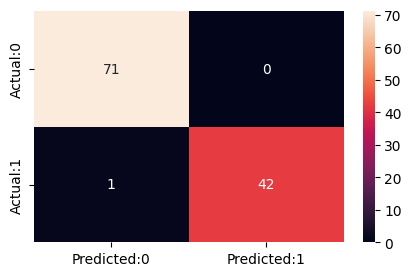

In [52]:
# Creates a confusion matrix comparing actual values (y_test) and predicted values (y_pred)
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

In [53]:
# Adds a new row to the 'result' DataFrame at index 3 with the following values:
result.loc[3]=['Logistic Regression', train_acc, test_acc, f1, recal, prec]

## Decision Tree

In [54]:
depth=[3,5,10,20]
min_samples=[2,5,10]

param_grid={"min_samples_split":min_samples,"max_depth":depth}

clf=DecisionTreeClassifier()

model=GridSearchCV(clf,param_grid,scoring=accuracy_score,cv=5,n_jobs=-1)

model.fit(X_train,y_train)

optimal_min=model.best_estimator_.min_samples_split
optimal_max=model.best_estimator_.max_depth

print("optimal min is:",optimal_min)
print("optimal max is:",optimal_max)

optimal min is: 2
optimal max is: 3


In [55]:
DT=DecisionTreeClassifier(max_depth=optimal_max,min_samples_split=optimal_min,random_state=40)

DT.fit(X_train,y_train)
y_pred=DT.predict(X_test)

In [56]:
# finding the accuracy,precision,recall and F1 scores for Decision Tree model
train_acc=DT.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9736263736263736
Testing Accuracy : 0.9385964912280702
F1 Score : 0.9156626506024096
Recall : 0.8837209302325582
Precision : 0.95


In [57]:
# Prints the classification report, which includes precision, recall, F1-score, and support for each class
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.95      0.88      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



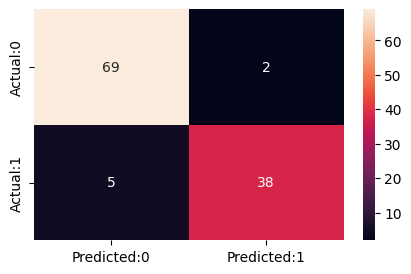

In [58]:
# Creates a confusion matrix comparing actual values (y_test) and predicted values (y_pred)
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

In [59]:
# Adds a new row to the 'result' DataFrame at index 4 with the following values:
result.loc[4]=['Decision Tree', train_acc, test_acc, f1, recal, prec]

## Random Forest

In [60]:
depth=[3, 5, 10, 15, 20, 25]
min_samples=[2, 5, 10, 20, 50]

param_grid={"min_samples_split":min_samples,"max_depth":depth}

clf=RandomForestClassifier()

model=GridSearchCV(clf,param_grid,cv=5,scoring=accuracy_score,n_jobs=-1)

model.fit(X_train,y_train)

optimal_min=model.best_estimator_.min_samples_split
optimal_max=model.best_estimator_.max_depth

print("optimal_min is:",optimal_min)
print("optimal_max is:",optimal_max)

optimal_min is: 2
optimal_max is: 3


In [61]:
RF=RandomForestClassifier(max_depth=optimal_max,min_samples_split=optimal_min,random_state=40)

RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)

In [62]:
# finding the accuracy,precision,recall and F1 scores for Random Forest model
train_acc=RF.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9868131868131869
Testing Accuracy : 0.9649122807017544
F1 Score : 0.9545454545454546
Recall : 0.9767441860465116
Precision : 0.9333333333333333


In [63]:
# Prints the classification report, which includes precision, recall, F1-score, and support for each class
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



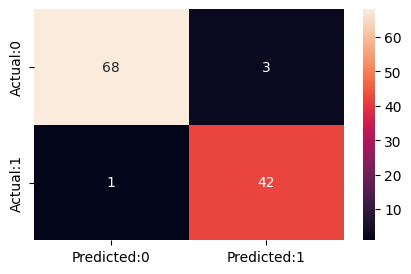

In [64]:
# Creates a confusion matrix comparing actual values (y_test) and predicted values (y_pred)
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

In [65]:
# Adds a new row to the 'result' DataFrame at index 5 with the following values:
result.loc[5]=['Random Forest', train_acc, test_acc, f1, recal, prec]

## **Model Selection**

In [66]:
result = result.sort_values(by='Testing Accuracy', ascending=False)
result

,Model,Training Accuracy,Testing Accuracy,F1 Score,Recall,Precision
3,Logistic Regression,0.986813,0.991228,0.988235,0.976744,1.000000
2,Logistic Regression,0.989011,0.982456,0.976190,0.953488,1.000000
0,KNN,0.969231,0.973684,0.963855,0.930233,1.000000
5,Random Forest,0.986813,0.964912,0.954545,0.976744,0.933333
1,Gaussian Naives Bayes,0.934066,0.938596,0.921348,0.953488,0.891304
4,Decision Tree,0.973626,0.938596,0.915663,0.883721,0.950000


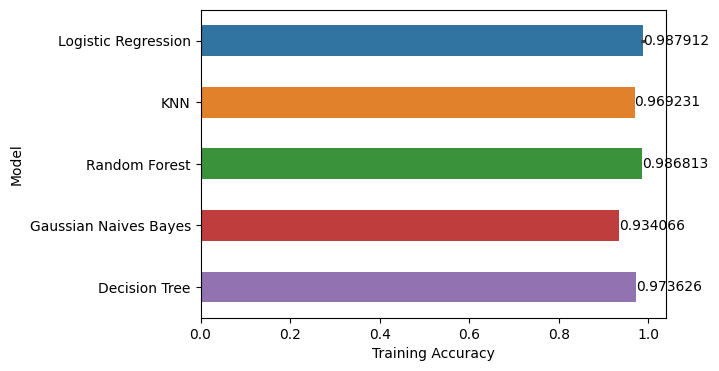

In [67]:
plt.figure(figsize=(6,4))
ax=sns.barplot(data=result,y='Model',x='Training Accuracy',palette="tab10",width=0.5)
for i in ax.containers:
    ax.bar_label(i)

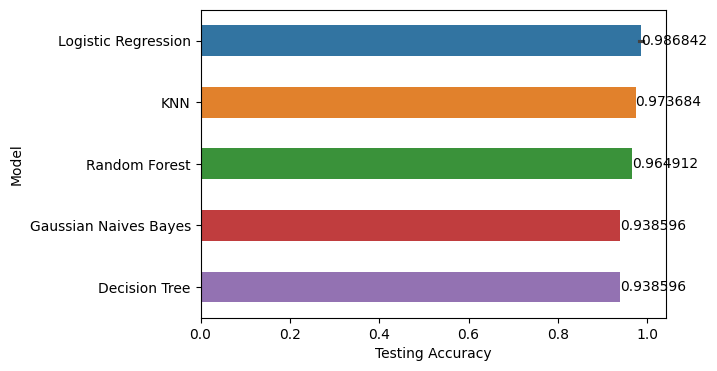

In [68]:
plt.figure(figsize=(6,4))
ax=sns.barplot(data=result,y='Model',x='Testing Accuracy',palette="tab10",width=0.5)
for i in ax.containers:
    ax.bar_label(i)

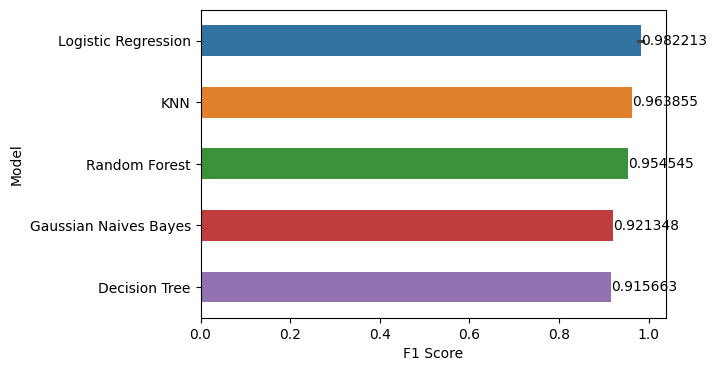

In [69]:
plt.figure(figsize=(6,4))
ax=sns.barplot(data=result,y='Model',x='F1 Score',palette="tab10",width=0.5)
for i in ax.containers:
    ax.bar_label(i)

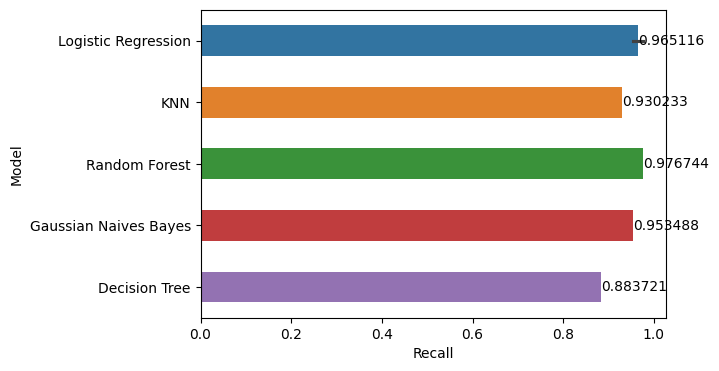

In [70]:
plt.figure(figsize=(6,4))
ax=sns.barplot(data=result,y='Model',x='Recall',palette="tab10",width=0.5)
for i in ax.containers:
    ax.bar_label(i)

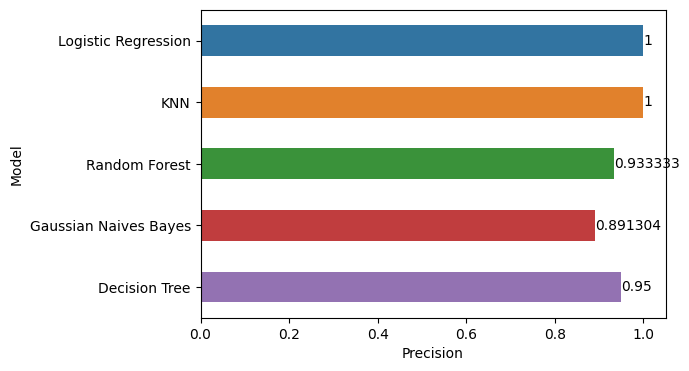

In [71]:
plt.figure(figsize=(6,4))
ax=sns.barplot(data=result,y='Model',x='Precision',palette="tab10",width=0.5)
for i in ax.containers:
    ax.bar_label(i)

In [72]:
# prompt: # prompt: dump all algorithms in single pickle file code

import pickle

# Assuming your trained models (knn, NB, LR, svm, DT, RF) and scaler are defined in the previous code
# Replace with actual model variables
models = {
    "knn": knn,
    "NB": NB,
    "LR": LR,
    "svm": svm,
    "DT": DT,
    "RF": RF,
    "scaler": scaler
}


# Save the models to a pickle file
with open('models.pkl', 'wb') as file:
    pickle.dump(models, file)
